In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets, metrics
from sklearn.neighbors import KNeighborsClassifier
from keras.datasets import mnist
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.externals import joblib
import pandas as pd
import time

Using TensorFlow backend.


In [2]:
# load data
(img_train, val_train),(img_test, val_test) = mnist.load_data()
print(img_train.shape)
print(img_test.shape)
# t = pd.DataFrame(val_train, columns=['label'])
# print(t.head(5))

(60000, 28, 28)
(10000, 28, 28)


In [3]:
# tt = t['label'].value_counts()
# print(tt)

Text(0.5, 1.0, "Distribution of Label's")

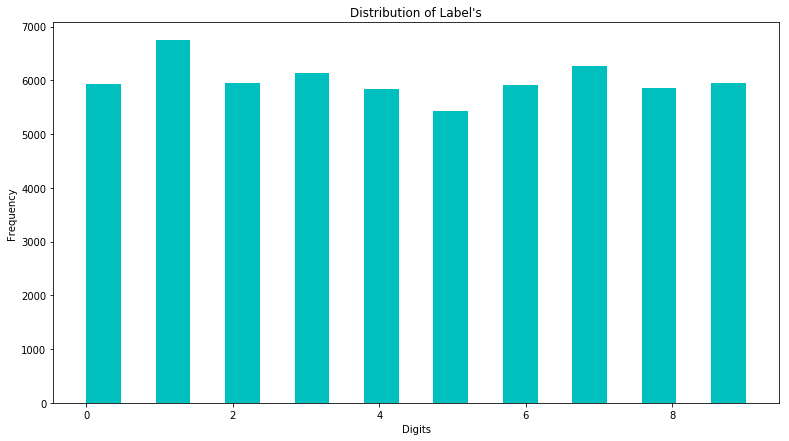

In [4]:
# data visualiztion
plt.figure(figsize=(13,7))
plt.hist( x=val_train, bins=19 ,color='c')
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.title('Distribution of Label\'s')

In [5]:
# convert images (matrixs) to vectors
n = len(img_train)
data = img_train.reshape(n, -1)
print(data.shape)

(60000, 784)


In [6]:
# declare and asign values for variables
max_k = 29
dist_algo = 'cosine'
index_name = []
train_time = []
predict_time = []
accuracy = []
headers = ['train-time','predict-time','accuracy']

In [7]:
# train model with KNN
for k in range(1, max_k+1, 2):
    print('Training ' + str(k) + '-NN with ' + dist_algo + ' distance algorithm')
    index_name.append(str(k) + '-NN')
    
    # create KNN classifier
    start = time.time()
    knn = KNeighborsClassifier(metric ='cosine', p=2, n_neighbors=k)
    knn.fit(data, val_train)
    end = time.time()
    
    print("Training time: %s seconds" % str(end - start))
    train_time.append(round(end-start,2))
    
    # save model using joblib
    filename = str(k) + '-NN ' + dist_algo + '.sav'
    joblib.dump(knn, filename)
    
    print("%s saved\n" %filename)
    
print('Train complete!')

Training 1-NN with cosine distance algorithm
Training time: 0.005998134613037109 seconds
1-NN cosine.sav saved

Training 3-NN with cosine distance algorithm
Training time: 0.004998922348022461 seconds
3-NN cosine.sav saved

Training 5-NN with cosine distance algorithm
Training time: 0.014991998672485352 seconds
5-NN cosine.sav saved

Training 7-NN with cosine distance algorithm
Training time: 0.0069959163665771484 seconds
7-NN cosine.sav saved

Training 9-NN with cosine distance algorithm
Training time: 0.005997180938720703 seconds
9-NN cosine.sav saved

Training 11-NN with cosine distance algorithm
Training time: 0.009993791580200195 seconds
11-NN cosine.sav saved

Training 13-NN with cosine distance algorithm
Training time: 0.004997968673706055 seconds
13-NN cosine.sav saved

Training 15-NN with cosine distance algorithm
Training time: 0.005996227264404297 seconds
15-NN cosine.sav saved

Training 17-NN with cosine distance algorithm
Training time: 0.005015134811401367 seconds
17-NN c

In [8]:
# convert test images (matrixs) to vectors
n = len(img_test)
test_data = img_test.reshape(n, -1)

# # predict data
# predicted = knn.predict(test_data)
# print(len(predicted))

In [9]:
for k in range(1, max_k+1, 2):
    # load model
    filename = str(k) + '-NN ' + dist_algo + '.sav'
    loaded_model = joblib.load(filename)
    
    # predict data
    start = time.time()
    predicted = loaded_model.predict(test_data)
    end = time.time()
    print('Predicting ' + str(k) + '-NN')
    print(len(predicted))
    
    print("Predict time: %s seconds" % str(end - start))
    predict_time.append(round(end-start,2))
    
    # calculate accuracy average
    num_correct=0
    for i in range(0,len(val_test)):
        if val_test[i] == predicted[i]:
            num_correct +=1
            
    print("Accuracy: \n%s" % str(float(num_correct / float(len(val_test)))))
    accuracy.append(float(num_correct / float(len(val_test))))
    
print('Predict complete')

Predicting 1-NN
10000
Predict time: 38.16171050071716 seconds
Accuracy: 
0.9723
Predicting 3-NN
10000
Predict time: 47.21393442153931 seconds
Accuracy: 
0.9733
Predicting 5-NN
10000
Predict time: 46.04303050041199 seconds
Accuracy: 
0.973
Predicting 7-NN
10000
Predict time: 42.13195586204529 seconds
Accuracy: 
0.9727
Predicting 9-NN
10000
Predict time: 44.55826544761658 seconds
Accuracy: 
0.9717
Predicting 11-NN
10000
Predict time: 39.51510548591614 seconds
Accuracy: 
0.9716
Predicting 13-NN
10000
Predict time: 39.79925751686096 seconds
Accuracy: 
0.97
Predicting 15-NN
10000
Predict time: 49.191609144210815 seconds
Accuracy: 
0.9699
Predicting 17-NN
10000
Predict time: 41.724969148635864 seconds
Accuracy: 
0.9687
Predicting 19-NN
10000
Predict time: 39.69587421417236 seconds
Accuracy: 
0.9682
Predicting 21-NN
10000
Predict time: 38.91396450996399 seconds
Accuracy: 
0.9682
Predicting 23-NN
10000
Predict time: 42.64933180809021 seconds
Accuracy: 
0.9674
Predicting 25-NN
10000
Predict tim

In [10]:
# save result
list_of_result = list(zip(train_time, predict_time, accuracy))
df = pd.DataFrame(list_of_result, columns=headers, index=index_name)
print(df)
df.to_csv('result_cosine.csv', sep=',')

       train-time  predict-time  accuracy
1-NN         0.01         38.16    0.9723
3-NN         0.00         47.21    0.9733
5-NN         0.01         46.04    0.9730
7-NN         0.01         42.13    0.9727
9-NN         0.01         44.56    0.9717
11-NN        0.01         39.52    0.9716
13-NN        0.00         39.80    0.9700
15-NN        0.01         49.19    0.9699
17-NN        0.01         41.72    0.9687
19-NN        0.00         39.70    0.9682
21-NN        0.01         38.91    0.9682
23-NN        0.00         42.65    0.9674
25-NN        0.01         42.48    0.9675
27-NN        0.00         41.43    0.9671
29-NN        0.00         43.70    0.9665
